In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import pickle
import os

# Importing Data

In [2]:
crop = pd.read_csv("Crop_recommendation.csv")
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


# Asq Six Question to yourself

In [3]:
crop.shape

(2200, 8)

In [3]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [4]:
crop.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [5]:
crop.duplicated().sum()

0

In [6]:
crop.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


# Exploring Data

In [7]:
corr = crop.corr(numeric_only = 'True')
corr

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


<Axes: >

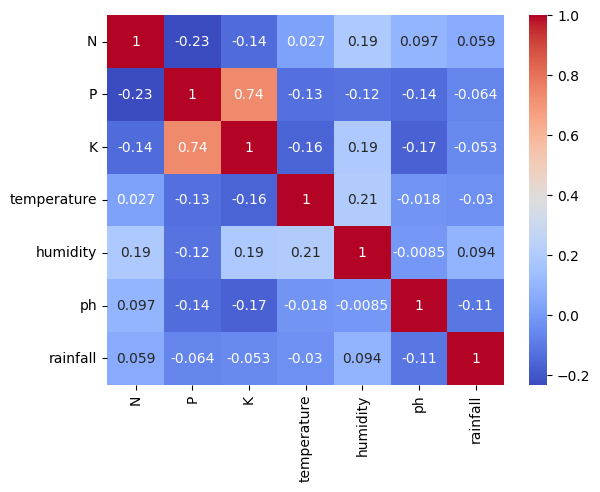

In [8]:
import seaborn as sns
sns.heatmap(corr,annot=True,cbar=True, cmap='coolwarm')

In [9]:
crop['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

# Encoding

In [10]:
crop_dict = {
    'rice': 1,
    'maize': 2,
    'jute': 3,
    'cotton': 4,
    'coconut': 5,
    'papaya': 6,
    'orange': 7,
    'apple': 8,
    'muskmelon': 9,
    'watermelon': 10,
    'grapes': 11,
    'mango': 12,
    'banana': 13,
    'pomegranate': 14,
    'lentil': 15,
    'blackgram': 16,
    'mungbean': 17,
    'mothbeans': 18,
    'pigeonpeas': 19,
    'kidneybeans': 20,
    'chickpea': 21,
    'coffee': 22
}
crop['crop_num']=crop['label'].map(crop_dict)

In [11]:
crop['crop_num'].value_counts()

crop_num
1     100
2     100
3     100
4     100
5     100
6     100
7     100
8     100
9     100
10    100
11    100
12    100
13    100
14    100
15    100
16    100
17    100
18    100
19    100
20    100
21    100
22    100
Name: count, dtype: int64

In [12]:
# crop.drop(['label'],axis=1,inplace=True)
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label,crop_num
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,1


# Train Test Split

In [13]:
X = crop.drop(['crop_num','label'],axis=1)
y = crop['crop_num']

In [14]:
X

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507
2196,99,15,27,27.417112,56.636362,6.086922,127.924610
2197,118,33,30,24.131797,67.225123,6.362608,173.322839
2198,117,32,34,26.272418,52.127394,6.758793,127.175293


In [15]:
y.shape

(2200,)

In [16]:
from sklearn.model_selection import train_test_split

In [17]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
X_train.shape

(1760, 7)

In [19]:
X_test.shape

(440, 7)

In [20]:
X_train

,N,P,K,temperature,humidity,ph,rainfall
1656,17,16,14,16.396243,92.181519,6.625539,102.944161
752,37,79,19,27.543848,69.347863,7.143943,69.408782
892,7,73,25,27.521856,63.132153,7.288057,45.208411
1041,101,70,48,25.360592,75.031933,6.012697,116.553145
1179,0,17,30,35.474783,47.972305,6.279134,97.790725
...,...,...,...,...,...,...,...
1638,10,5,5,21.213070,91.353492,7.817846,112.983436
1095,108,94,47,27.359116,84.546250,6.387431,90.812505
1130,11,36,31,27.920633,51.779659,6.475449,100.258567
1294,11,124,204,13.429886,80.066340,6.361141,71.400430



# Scale the features using MinMaxScaler

In [21]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()

X_train = ms.fit_transform(X_train)
X_test = ms.transform(X_test)

In [22]:
X_train

array([[0.12142857, 0.07857143, 0.045     , ..., 0.9089898 , 0.48532225,
        0.29685161],
       [0.26428571, 0.52857143, 0.07      , ..., 0.64257946, 0.56594073,
        0.17630752],
       [0.05      , 0.48571429, 0.1       , ..., 0.57005802, 0.58835229,
        0.08931844],
       ...,
       [0.07857143, 0.22142857, 0.13      , ..., 0.43760347, 0.46198144,
        0.28719815],
       [0.07857143, 0.85      , 0.995     , ..., 0.76763665, 0.44420505,
        0.18346657],
       [0.22857143, 0.52142857, 0.085     , ..., 0.56099735, 0.54465022,
        0.11879596]])

# Standarization

In [23]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()


X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [24]:
X_train

array([[-9.03426596e-01, -1.12616170e+00, -6.68506601e-01, ...,
         9.36586183e-01,  1.93473784e-01,  5.14970176e-03],
       [-3.67051340e-01,  7.70358846e-01, -5.70589522e-01, ...,
        -1.00470485e-01,  8.63917548e-01, -6.05290566e-01],
       [-1.17161422e+00,  5.89737842e-01, -4.53089028e-01, ...,
        -3.82774991e-01,  1.05029771e+00, -1.04580687e+00],
       ...,
       [-1.06433917e+00, -5.24091685e-01, -3.35588533e-01, ...,
        -8.98381379e-01, -6.34357580e-04, -4.37358211e-02],
       [-1.06433917e+00,  2.12501638e+00,  3.05234239e+00, ...,
         3.86340190e-01, -1.48467347e-01, -5.69036842e-01],
       [-5.01145154e-01,  7.40255346e-01, -5.11839275e-01, ...,
        -4.18045489e-01,  6.86860180e-01, -8.96531475e-01]])

# Training Models

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

model_dir = 'models'
if not os.path.exists(model_dir):
    os.makedirs(model_dir)

# create instances of all models
models = {
    'Logistic Regression': LogisticRegression(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Bagging': BaggingClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
}

ypred={}
for name, md in models.items():
    md.fit(X_train,y_train)
    ypred[name] = md.predict(X_test)
    print(f"{name}  with accuracy : {accuracy_score(y_test,ypred[name])}")
    pickle.dump(md, open(os.path.join(model_dir, f'{name.replace(" ", "_").lower()}.pkl'), 'wb'))
    

Logistic Regression  with accuracy : 0.9636363636363636
Support Vector Machine  with accuracy : 0.9681818181818181
K-Nearest Neighbors  with accuracy : 0.9590909090909091
Decision Tree  with accuracy : 0.9818181818181818
Random Forest  with accuracy : 0.9931818181818182
Bagging  with accuracy : 0.990909090909091
Gradient Boosting  with accuracy : 0.9818181818181818


In [27]:
from sklearn.metrics import precision_score, recall_score, accuracy_score
import pandas as pd

# Example y_true and y_pred for each model (you should replace these with your actual values)
y_true = y_test # True labels for the dataset

# Initialize a dictionary to store the metrics
metrics = {
    'Model': [],
    'Precision': [],
    'Recall': [],
    'Accuracy': []
}

# Calculate precision, recall, and accuracy for each model
for model_name, y_pred in ypred.items():
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    accuracy = accuracy_score(y_true, y_pred)
    
    # Append metrics to the dictionary
    metrics['Model'].append(model_name)
    metrics['Precision'].append(precision)
    metrics['Recall'].append(recall)
    metrics['Accuracy'].append(accuracy)

# Convert the dictionary to a DataFrame for better visualization
metrics_df = pd.DataFrame(metrics)

# Display the DataFrame
print(metrics_df)


                    Model  Precision    Recall  Accuracy
0     Logistic Regression   0.964442  0.963636  0.963636
1  Support Vector Machine   0.971517  0.968182  0.968182
2     K-Nearest Neighbors   0.965390  0.959091  0.959091
3           Decision Tree   0.982402  0.981818  0.981818
4           Random Forest   0.993735  0.993182  0.993182
5                 Bagging   0.991162  0.990909  0.990909
6       Gradient Boosting   0.984271  0.981818  0.981818


dict_keys(['Logistic Regression', 'Support Vector Machine', 'K-Nearest Neighbors', 'Decision Tree', 'Random Forest', 'Bagging', 'Gradient Boosting'])

In [35]:
new_metrics = {
    'Model': models.keys(),
    'Precision': [0.964442,0.971517,0.965390,0.982402,0.993735,0.97162,0.984271],
    'Recall': [0.963636,0.968182,0.959091,0.981818,0.993182,0.980909,0.981818],
    'Accuracy': [0.963636,0.968182,0.959091,0.981818,0.993182,0.985909,0.981818]
}
new_metrics_df = pd.DataFrame(new_metrics)

# Display the DataFrame
print(new_metrics_df)


                    Model  Precision    Recall  Accuracy
0     Logistic Regression   0.964442  0.963636  0.963636
1  Support Vector Machine   0.971517  0.968182  0.968182
2     K-Nearest Neighbors   0.965390  0.959091  0.959091
3           Decision Tree   0.982402  0.981818  0.981818
4           Random Forest   0.993735  0.993182  0.993182
5                 Bagging   0.971620  0.980909  0.985909
6       Gradient Boosting   0.984271  0.981818  0.981818


In [39]:
new_metrics = {
    'Model':['Support Vector Machine (SVM)', 'K Nearest Neighbor (KNN)', 'Random Forest (RF)'],
    'previous model Accuracy': [0.75,0.90,0.95],
    'Our model Accuracy': [0.96,0.95,0.99]
}
new_metrics_df = pd.DataFrame(new_metrics)

# Display the DataFrame
print(new_metrics_df)


                          Model  previous model Accuracy  Our model Accuracy
0  Support Vector Machine (SVM)                     0.75                0.96
1      K Nearest Neighbor (KNN)                     0.90                0.95
2            Random Forest (RF)                     0.95                0.99


In [27]:
from sklearn.metrics import classification_report
for name,value in ypred.items():
    print(name)
    print(classification_report(y_test,value))

Logistic Regression
              precision    recall  f1-score   support

           1       0.88      0.79      0.83        19
           2       1.00      0.95      0.98        21
           3       0.83      0.87      0.85        23
           4       0.94      1.00      0.97        17
           5       1.00      1.00      1.00        27
           6       0.96      0.96      0.96        23
           7       1.00      1.00      1.00        14
           8       1.00      1.00      1.00        23
           9       1.00      1.00      1.00        17
          10       1.00      1.00      1.00        19
          11       1.00      1.00      1.00        14
          12       1.00      1.00      1.00        19
          13       1.00      1.00      1.00        21
          14       1.00      1.00      1.00        23
          15       0.85      1.00      0.92        11
          16       0.90      0.95      0.93        20
          17       1.00      1.00      1.00        19
       

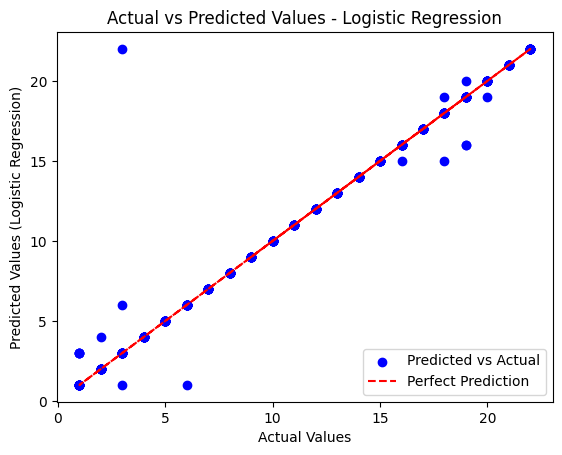

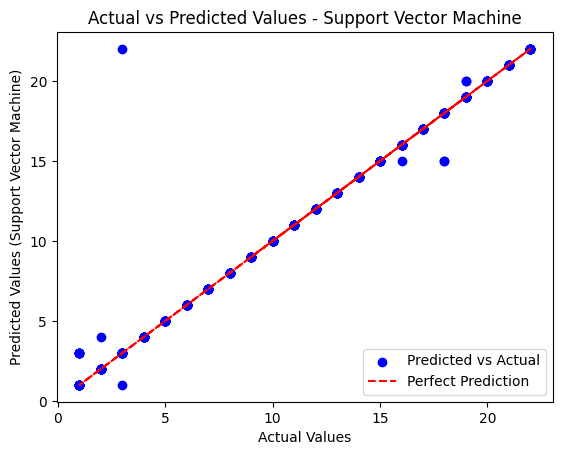

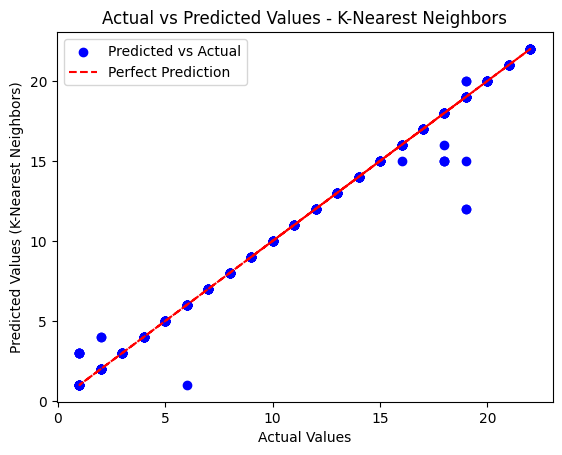

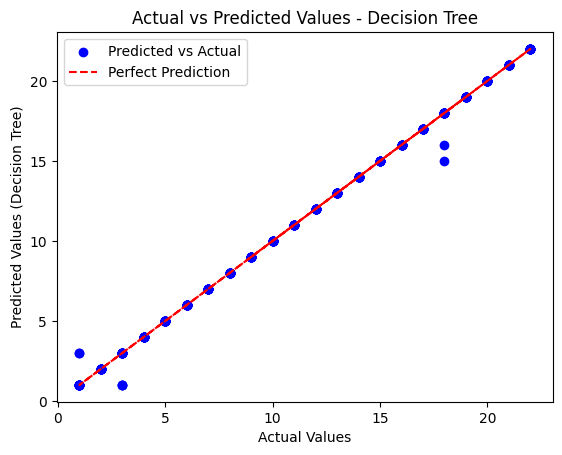

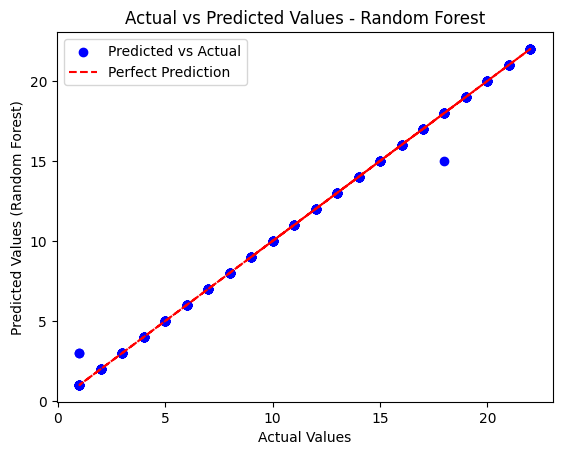

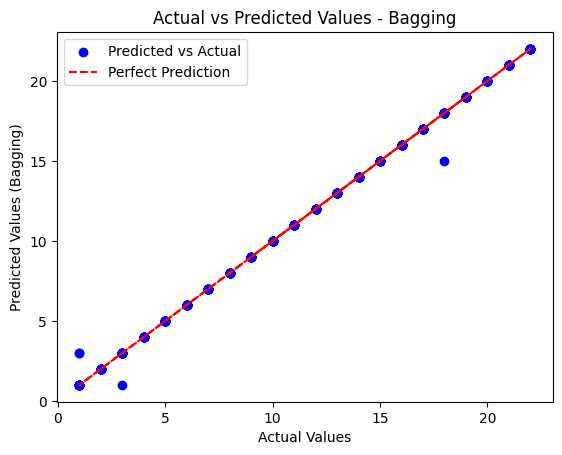

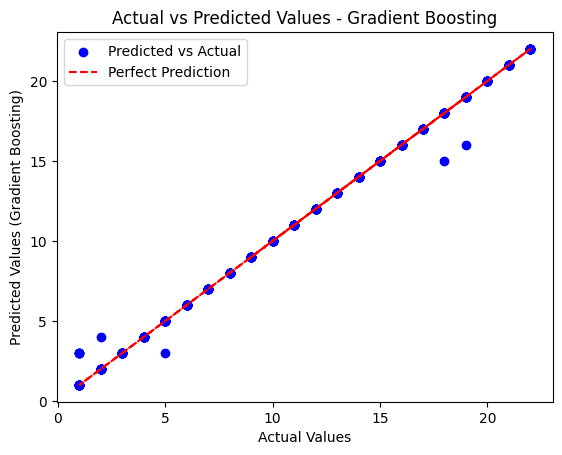

In [28]:
import matplotlib.pyplot as plt
for model_name, predictions in ypred.items():
    plt.figure()
    plt.scatter(y_test, predictions, color='blue', label='Predicted vs Actual')
    plt.plot(y_test, y_test, color='red', linestyle='--', label='Perfect Prediction')
    plt.xlabel('Actual Values')
    plt.ylabel(f'Predicted Values ({model_name})')
    plt.title(f'Actual vs Predicted Values - {model_name}')
    plt.legend()
    plt.show()

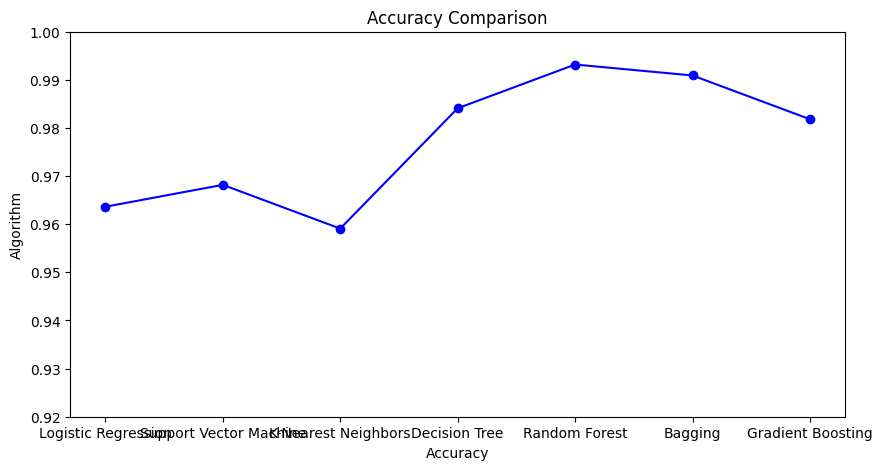

In [29]:
acc = []
model = []
for name,value in ypred.items():
    acc.append(accuracy_score(y_test,ypred[name]))
    model.append(name)
plt.figure(figsize=[10, 5], dpi=100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')

# Create a scatter plot
plt.scatter(model, acc, color='blue')
plt.plot(model, acc, color='blue')

plt.ylim(0.92, 1)
plt.show()

In [30]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
ypred = rfc.predict(X_test)
accuracy_score(y_test,ypred)

0.9931818181818182

# Predictive System

In [31]:
def recommendation(N,P,k,temperature,humidity,ph,rainfal):
    features = np.array([[N,P,k,temperature,humidity,ph,rainfal]])
    transformed_features = ms.transform(features)
    transformed_features = sc.transform(transformed_features)
    prediction = rfc.predict(transformed_features).reshape(1,-1)
    
    return prediction[0] 

In [32]:
N = 61
P = 52
k = 41
temperature = 24.97669518
humidity = 83.891805
ph = 6.880431223
rainfall = 204.8001847

predict = recommendation(N,P,k,temperature,humidity,ph,rainfall)


crop_dict = {1: "Rice", 2: "Maize", 3: "Jute", 4: "Cotton", 5: "Coconut", 6: "Papaya", 7: "Orange",
                 8: "Apple", 9: "Muskmelon", 10: "Watermelon", 11: "Grapes", 12: "Mango", 13: "Banana",
                 14: "Pomegranate", 15: "Lentil", 16: "Blackgram", 17: "Mungbean", 18: "Mothbeans",
                 19: "Pigeonpeas", 20: "Kidneybeans", 21: "Chickpea", 22: "Coffee"}

if predict[0] in crop_dict:
    crop = crop_dict[predict[0]]
    print("{} is a best crop to be cultivated ".format(crop))
else:
    print("Sorry are not able to recommend a proper crop for this environment")

Rice is a best crop to be cultivated 


c:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [33]:
import pickle
pickle.dump(rfc,open('model.pkl','wb'))
pickle.dump(ms,open('minmaxscaler.pkl','wb'))
pickle.dump(sc,open('standscaler.pkl','wb'))